# Lab 3 Vision par ordinateur : Apprentissage profond

Author: Mohsen Benlazreg M.ing en GPA

Mise à jour: Étienne Pepin

REF : https://keras.io/examples/
#### requirements :
numpy  
sklearn  
tensorflow

# Partie 1 : Introduction au réseau de neurones

Dans cette partie nous commencerons par un premier exemple concret d'un réseau de neurones, qui utilise la bibliothèque Keras pour apprendre à classifier les chiffres manuscrits. Le problème que nous essayons de résoudre ici est de classer les images en niveaux de gris de chiffres manuscrits (28 pixels par 28 pixels), dans leur 10 catégories (0 à 9).
La base de bonnées que nous utiliserons est MNIST, elle est trés populaire dans la communauté d'apprentissage profond et contient 60 000 images d'entraînement, plus 10 000 d'images de test.
Vous pouvez penser à «résoudre» le MNIST comme le «Hello World» de l'apprentissage profond.

In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4201069475801395023
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6469084774
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16830824270636719047
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


La base de données MNIST est offerte par Keras sous forme d'un ensemble de vecteur numpy. 

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


`train_images` et `train_labels` forment la base d'apprentissage, ce sont les données que notre modèle va apprendre. Le modèle sera ensuite testé sur `test_images` en donnant les vrais labels `test_labels` pour calculer sa précision. Nos images sont codées sous forme de tableaux Numpy, et les étiquettes sont simplement un tableau de chiffres, allant de 0 à 9.

Jetons un coup d'œil aux données d'entraînement:

In [5]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


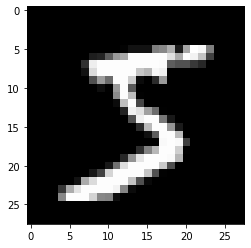

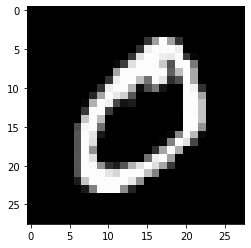

In [6]:
plt.imshow(train_images[0],cmap='gray')
plt.show()
plt.imshow(train_images[1],cmap='gray')

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Jetons un coup d'œil aux données de test:

In [8]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


La démarche à suivre est la suivante : nous construirons d'abord notre réseau de neurones avec les données d'entraînement, `train_images` et `train_labels`. Le réseau apprendra ensuite à associer des images et des étiquettes. Enfin, nous demanderons au réseau de produire des prédictions pour `test_images`, et nous vérifierons si ces prédictions correspondent aux étiquettes de `test_labels`.

On commence par construire notre réseau de neurone :

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(10, activation='softmax'))

Ici, notre réseau se compose d'une séquence de deux couches `dense`, qui sont des couches neuronales entièrement connectées (également appelées «fully-connected»). La deuxième (et dernière) couche est une couche "softmax" à 10 sorties, ce qui signifie qu'elle renverra un tableau de 10 scores de probabilité. Chaque score correspondra à la probabilité que l'image numérique actuelle appartienne à l'une de nos classes à 10 chiffres.

Pour préparer notre réseau, nous devons choisir trois autres choses, dans le cadre de l'étape de "compilation":

`Une fonction de perte`: c'est avec cette fonction que le réseau pourra mesurer la qualité d'un travail sur ses données d'entrainement, et donc comment il pourra s'orienter dans la bonne direction.

`Un optimiseur`: c'est le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa fonction de perte.

`Mesures à surveiller pendant l'entrainement et les tests`. Ici, nous nous intéresserons que de la précision.

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Avant l'entrainement, nous allons prétraiter nos données en la forme attendue par le réseau et en les mettant à l'échelle de sorte que toutes les valeurs soient à l'intervalle `[0, 1]`.

In [11]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images=train_images.reshape((train_images.shape[0],28*28))
test_images=test_images.reshape((test_images.shape[0],28*28))

Nous devons également changer le type des étiquettes en `categorical`

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
print(train_images.shape)

(60000, 784)


Maintenant nous sommes prêts à faire l'entrainement :

In [14]:
network.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 5s 4ms/step - loss: 0.2598 - accuracy: 0.9245
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1027 - accuracy: 0.9689
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9847


On check maintenant la performance de notre model dans la base de test :


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9766


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9765999913215637


# Exercice 1:

1-Ajouter 1 ou 2 couches cachées au réseau de neurones utilisé et decrire comment ça affecte la précision.

2-Essayer de modifier le nombre de neurones pour chaque couche. 

3-Essayer la fonction d'activation `tanh` au lieu de `relu`.

4-Modifier l'optimiseur `rmsprop` par `sgd` et/ou `adam`

1- En ajoutant deux couches cachées, la précision est légérement augmentée : elle passe de 0.9766 à 0.9803

In [21]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [22]:
network2.fit(train_images, train_labels, epochs=4, batch_size=128)
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)
print('test_acc:', test_acc2)

Epoch 1/4
469/469 [==============================] - 3s 5ms/step - loss: 0.2332 - accuracy: 0.9277
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0879 - accuracy: 0.9732
Epoch 3/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0609 - accuracy: 0.9815
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9803
test_acc: 0.9803000092506409


Réponse 1- Les couches cachées augmentent la précision du réseau de neurones car elles permettent de mieux entrainer le réseau. Cependant, si le nombre de couches cachées est trop élevé, le modèle sera capable de s'entrainer mais pas de généraliser à de nouvelles données. 

2

In [23]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(1024, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(2048, activation='relu', input_shape=(28* 28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
network2.fit(train_images, train_labels, epochs=4, batch_size=128)
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)
print('test_acc:', test_acc2)

Epoch 1/4
469/469 [==============================] - 4s 6ms/step - loss: 0.2364 - accuracy: 0.9290
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0969 - accuracy: 0.9721
Epoch 3/4
469/469 [==============================] - 3s 6ms/step - loss: 0.0744 - accuracy: 0.9795
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9561
test_acc: 0.9560999870300293


Réponse 2- Lorsque le nombre de neurones augmente pour chaque couche, la précision s'améliore. Mais, si le nombre de neurones pour chaque couche est trop élevé, le réseau a une capacité de traitement de l'information si importante que la quantité limitée d'informations contenues ne suffit pas a entrainer tous les neurones des réseaux cachés. De plus, le temps de calcul est plus long et la précision n'augmente pas significativement.

3

In [27]:
network = models.Sequential()
network.add(layers.Dense(512, activation='tanh', input_shape=(28* 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=4, batch_size=128)
print('test_acc:', test_acc)

Epoch 1/4
469/469 [==============================] - 3s 5ms/step - loss: 0.3364 - accuracy: 0.9003
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1729 - accuracy: 0.9495
Epoch 3/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1156 - accuracy: 0.9658
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0857 - accuracy: 0.9747
test_acc: 0.9765999913215637


Réponse 3- La durée d'activation avec la fonction tanh est globalement la même qu'avec la fonction relu. L'avantage de la fonction relu est d'empecher la saturation de son gradient lors de l'algorithme de descente du gradient, donc il converge plus rapidemement que la fonction tanh. De plus, cette fonction est moins couteuse que tanh (dû au calcul des exponentielles).

4

In [28]:
network = models.Sequential()
network.add(layers.Dense(512, activation='tanh', input_shape=(28* 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=4, batch_size=128)
print('test_acc:', test_acc)

Epoch 1/4
469/469 [==============================] - 2s 3ms/step - loss: 0.3257 - accuracy: 0.9061
Epoch 2/4
469/469 [==============================] - 1s 3ms/step - loss: 0.1773 - accuracy: 0.9482
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1207 - accuracy: 0.9651
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0893 - accuracy: 0.9741
test_acc: 0.9765999913215637


Réponse 4- L'algorithme sgd (méthode de descente du gradient) est plus rapide (8.2s) que les deux autres mais sa précision est dégradée (0.925). L'algorithme rmsprop (Root Mean Square propagation) est le plus lent des trois (11.9s) et la précision est de 0.978. L'algorithme adam combine les avantages de deux extensions sgd : rmsprop et adagrad. Il est donc aussi rapide que sgd et sa précision est la même que rmsprop. C'est le meilleur compromis des 3 algorithmes en terme de précision et de rapidité.

# Partie 2 : Introduction au Réseau de neurones convolutifs

Dans cette partie on va créer un reseau de neurones convolutifs pour resoudre le problème de classfication des chiffres manuscrits de la base de données MNIST. 

Les 6 lignes ci-dessous montrent l'architecture basique d'un CNN.

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

On remarque que la couche de convolution reçoit comme entrée un tenseur de forme `(image_height, image_width, image_channels)`. Dans notre cas, nos images sont en niveau de gris donc `image_channels=1`. 

Affichons l'architecture de notre CNN :

In [30]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


maintenant on doit ajouter notre classificateur qui est un reseau de neurones entièrement connectées 

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)               

Comme vous pouvez remarquer, la couche de "flatten" est entre la partie d'extraction de caracteristiques et la partie de classfication. Il s'agit de rendre le tenseur 3D en tenseur 1D.  

Prétraitement de données :

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Commencer l'entrainement:

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=4, batch_size=64)

Epoch 1/4
938/938 [==============================] - 15s 7ms/step - loss: 0.1619 - accuracy: 0.9500
Epoch 2/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0459 - accuracy: 0.9853
Epoch 3/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0321 - accuracy: 0.9901
Epoch 4/4
938/938 [==============================] - 6s 7ms/step - loss: 0.0236 - accuracy: 0.9926


Visualisation des courbes de précision et erreur lors de l'entrainement:

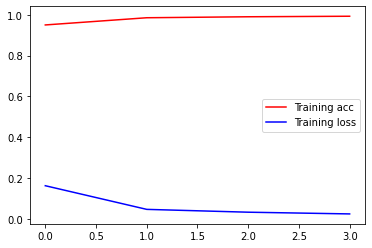

In [34]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

Évaluation du model dans la base de test:
    

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9908
test_acc 0.9908000230789185


# Exercice 2:

Modifier les hyper-paramétres de CNN et commenter les résultats. 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)              

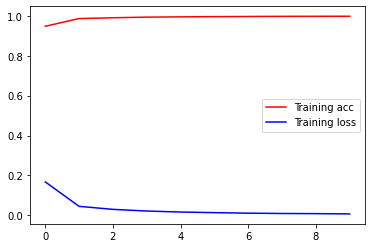

313/313 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9929
test_acc 0.992900013923645


In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=10, batch_size=64)
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc',test_acc)

Choix des hyperparamètres : nombre de filtres, forme du filtre et forme du MaxPooling. 
1) Nombre de filtres : pour préserver l'information il faut maintenir le nombre d'images intermédiaires croissant d'une couche à l'autre. Il faut donc que les couches en sortie aient plus d'images que les couches en entrée (dans notre cas, 32 - 64 - 128). 
2) Forme du filtre : comme notre image est de taille 28x28, il est plus approprié d'utiliser un filtre 5x5 sur la première couche. Cela améliore la précision.  
3) Forme du MaxPooling : La valeur 2x2 est un très bon choix. En essayant d'augmenter la taille on risque de perdre de l'information.

# Partie 3 : Classification d'objets


L'une des caractéristiques fondamentales de l'apprentissage profond est qu'il est capable de trouver des caractéristiques intéressantes dans les données d'entrainement, sans avoir besoin d'une ingénierie manuelle pour extraire ces caractéristiques, et cela ne peut être réalisé que lorsque de nombreux exemples d'entrainement sont disponibles.

##### Télechargement de dataset_Lab3_partie3

La base de données proposée dans cette partie est formée par 500 images divisées équitabelement sur 10 classes.  

Lire les images à partir des dossiers :

In [41]:
import os
import cv2
import numpy as np

def load_data (data_path,img_shape):
    data_dir_list = os.listdir(data_path)
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    num_channel=img_shape[2]


    labels=[]
    data=[]
    len_list_img=0
    num_class=0
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)    
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.resize(input_img,(img_rows,img_cols))
            data.append(input_img)
            labels.append(num_class)
        num_class+=1

    data = np.array(data)
    data = data.astype('float32')
    data /= 255
    labels=np.array(labels)
    print('data shape',data.shape)
    print('labels shape',labels.shape)
    return data, labels

In [42]:
data_path='mini_Caltech101'
img_shape=[224,224,3]
data, labels=load_data (data_path,img_shape)

data shape (500, 224, 224, 3)
labels shape (500,)


Maintenant nous avons bien lu toutes les images et donné à chacune une étiquette. 
Vous pouvez utiliser la fonction ci-desous pour afficher une image en donnant un numéro aléatoire entre 0 et 499(nombre total d'images dans la base de données).

In [43]:
def show_img (data,index):
    if index>=data.shape[0] :
        return print('index doit etre entre 0 et',data.shape[0])
    img=data[index]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)


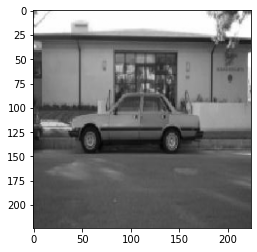

In [44]:
show_img(data,51)

L'étape prochaine est la division de notre base de données en train et test. Cette étape est facile en utilisant la fonction `train_test_split` offerte par `sklearn`.  

In [45]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes=10
Y = to_categorical(labels, num_classes)
X_train,y_train = shuffle(data,Y, random_state=2)
X_train, X_test, y_train , y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=2)


Définition de notre CNN: 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras import layers

model = Sequential()
model.add(Convolution2D(16, 3,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 74, 74, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 74, 74, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)        

In [47]:
# Training
n_epoch=100
hist = model.fit(X_train, y_train, batch_size=15, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
24/24 [==============================] - 1s 24ms/step - loss: 2.3084 - accuracy: 0.0886 - val_loss: 2.3000 - val_accuracy: 0.0933
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 2.3071 - accuracy: 0.0971 - val_loss: 2.3002 - val_accuracy: 0.1000
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2899 - accuracy: 0.1200 - val_loss: 2.2800 - val_accuracy: 0.1867
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2739 - accuracy: 0.1514 - val_loss: 2.2424 - val_accuracy: 0.2067
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2423 - accuracy: 0.1571 - val_loss: 2.1897 - val_accuracy: 0.1867
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1781 - accuracy: 0.1971 - val_loss: 2.1480 - val_accuracy: 0.1800
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1469 - accuracy: 0.1857 - val_loss: 2.1240 - val_accuracy: 0.1800
Epoch 

On visualise maintenant les résultats obtenus :

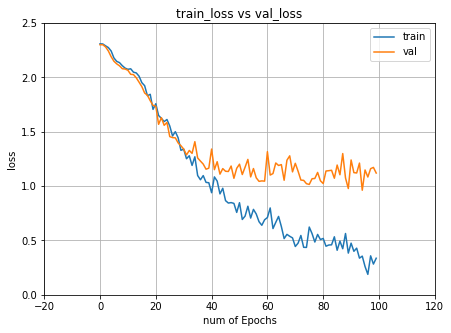

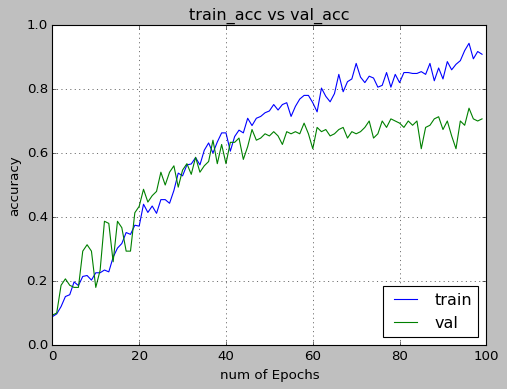

In [48]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(n_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

Évaluation de notre model :

In [49]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
predict_x=model.predict(test_image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(y_test[0:1])

5/5 [==============================] - 0s 17ms/step - loss: 1.1198 - accuracy: 0.7067
Test Loss: 1.1197746992111206
Test accuracy: 0.7066666483879089
(1, 224, 224, 3)
[[2.6070044e-04 4.0562439e-04 8.4000200e-02 1.2410913e-02 7.5155735e-01
  4.9512106e-04 3.5439033e-02 4.4152080e-03 3.4354159e-04 1.1067234e-01]]
[4]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Maintenant notre modèle est bien entrainé, on peut visualiser les cartes de caractéristiques pour une image de test. Les cartes de caractéristiques sont les réponses des filtres par l'opération de convolution de l'image en entrée.

In [50]:

def get_featuremaps(model, layer_idx, X_batch):
    #from keras import backend as K
    from tensorflow.python.keras import backend as K
    get_activations = K.function([model.input], [model.layers[layer_idx].output])
    activations = get_activations([X_batch])
    return activations

def show_feature_map(layer_num,filter_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]
    fig=plt.figure(figsize=(5,5))
    plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
    
def show_feature_maps(layer_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]    
    num_of_featuremaps=feature_maps.shape[2]
    fig=plt.figure(figsize=(16,16))
    plt.title("featuremaps-layer-{}".format(layer_num))
    subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
    for i in range(int(num_of_featuremaps)):
        ax = fig.add_subplot(subplot_num, subplot_num, i+1)
        ax.imshow(feature_maps[:,:,i],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

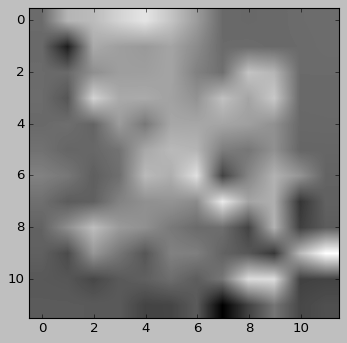

In [51]:
layer_num=3
filter_num=0
show_feature_map(layer_num,filter_num,test_image)

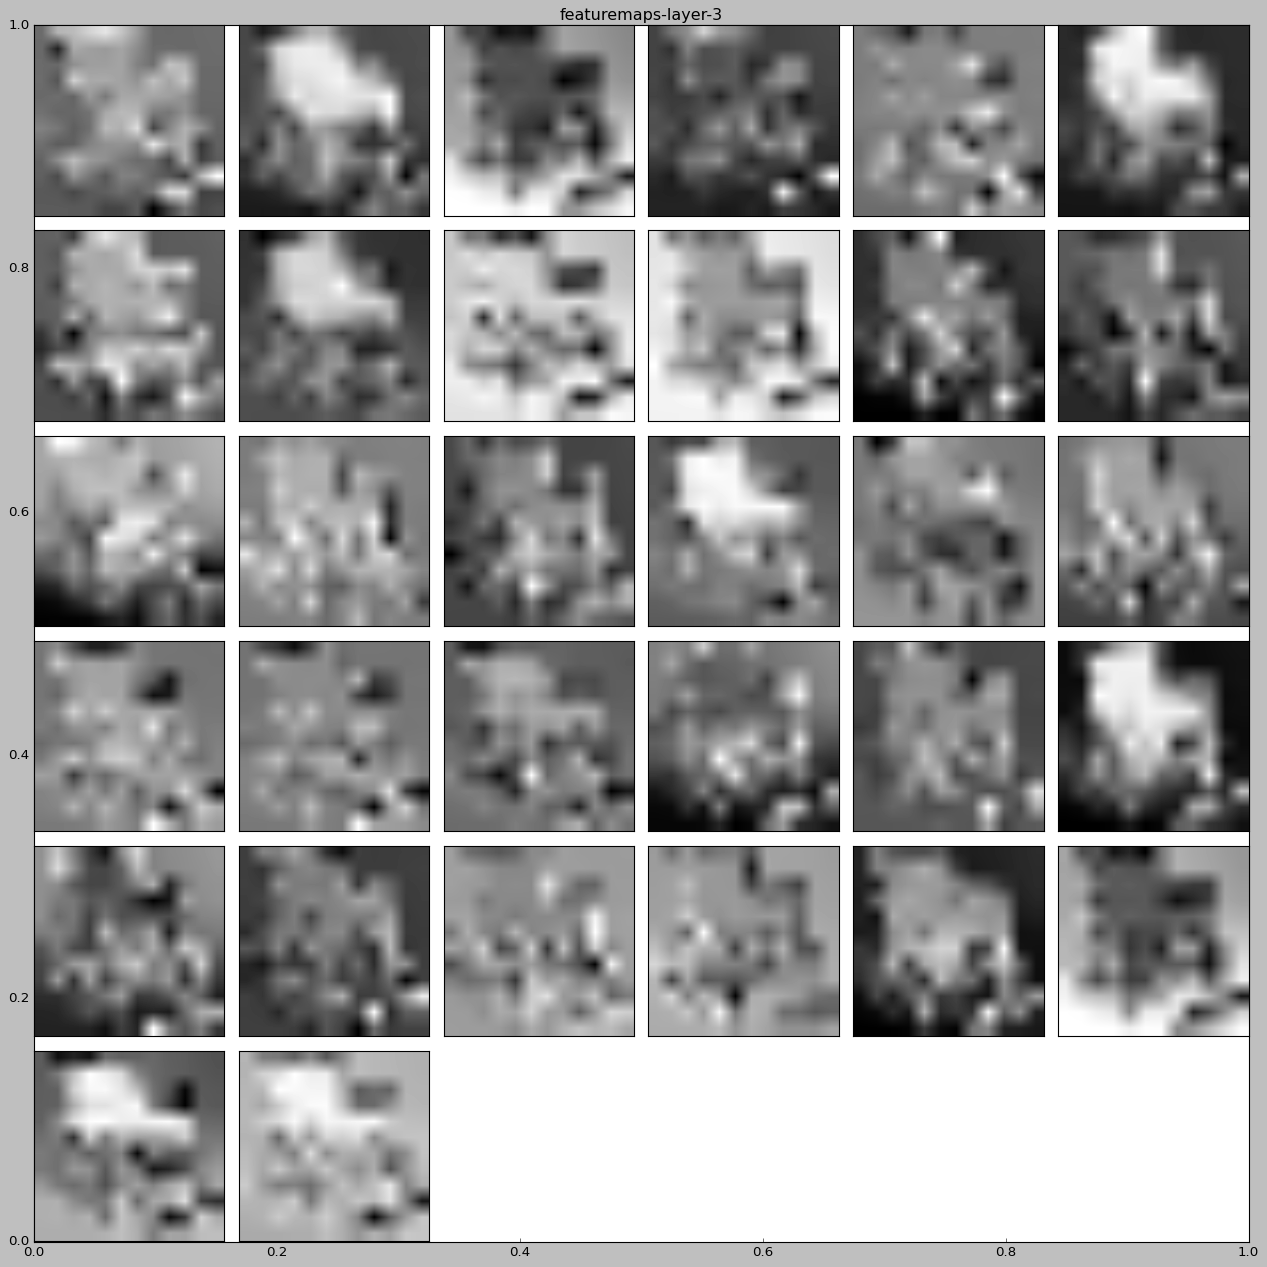

In [52]:
show_feature_maps(layer_num,test_image)

On souhaite mesurer la qualité de notre model de classification. Pour cela, on veut savoir :
* Combien d'images sont faussement estimées pour chaque classe ?
* Combien d'images sont bien classées pour chaque classe ?

La matrice de confusion est le meilleur outil ! 

In [53]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)


[4 8 8 3 3 0 5 8 9 3 1 9 5 9 1 3 5 7 7 1 6 3 8 1 5 7 6 7 9 9 8 6 5 0 8 5 7
 7 9 9 8 1 3 2 8 6 2 2 0 8 6 8 1 5 8 1 7 1 1 0 8 1 5 5 0 8 1 6 4 3 0 5 5 2
 8 3 2 4 7 5 6 6 6 3 5 4 8 2 5 1 8 5 1 5 1 1 9 0 0 9 7 5 8 9 5 2 5 5 8 3 5
 2 8 3 3 9 1 0 3 1 3 3 4 6 7 1 2 6 0 2 0 7 9 1 8 1 0 4 1 2 6 5 0 9 9 2 2 9
 5 0]


Confusion matrix, without normalization


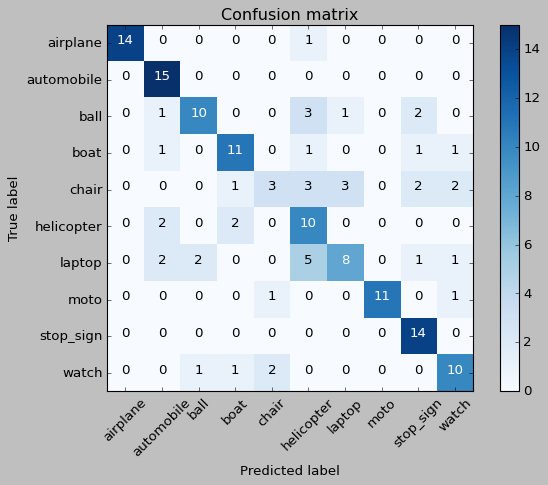

In [55]:
# Compute confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), classes_x))

np.set_printoptions(precision=2)
target_names = os.listdir(data_path)
plot_confusion_matrix(cnf_matrix,normalize=False, classes=target_names,
                      title='Confusion matrix')

# Exercice 3

# Évaluation :
### Vous devez fournir un fichier .ipynb avec les réponses aux questions.
Exercice 1 : 25%
Exercice 2 : 25%
Exercice 3 : 50%

1- Commenter les résultats obtenus dans cette partie.
La validation loss arrête de diminuer après environ 30 epochs alors que la training loss diminue : on est en overfitting sur les données d'entraînement. 
Les chaises sont très mal reconnues : presque uniformement comme chaise, helicoptère, laptop, stopsign ou watch

2- À quoi servent les couches de dropout ?
Elles sont supposées éviter l'overfitting. Elles permettent également de créer des représentations plus compacte.

3- Modifier les paramètres de l'optimisateur et comparer les résultats. 


1- La matrice de confusion comprend, pour chaque cellule, les éléments de la ligne i qui ont été estimés comme appartenant à ceux de la colonne j. Les éléments qui ont été bien reconnus se retrouvent donc sur la diagonale. Le système de classification est assez performant puisqu'il arrive à bien reconnaitre les objets. Certains éléments on été plus souvent mal-estimés : chaise et ordinateur, et d'autres ont été mieux estimés : moto, montre et voiture. 
On remarque de plus que la perte est plus élevée durant la validation du modèle plutôt qu'à l'entrainement et la précision est meilleure pendant l'entrainement. C'est parce que le modèle est confronté à des images nouvelles.

2- Le dropout est la désactivation temporaire de certains neurones dans le réseau. Cela permet de réduire l'overfitting lors de l'entrainement. 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 74, 74, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 74, 74, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)        

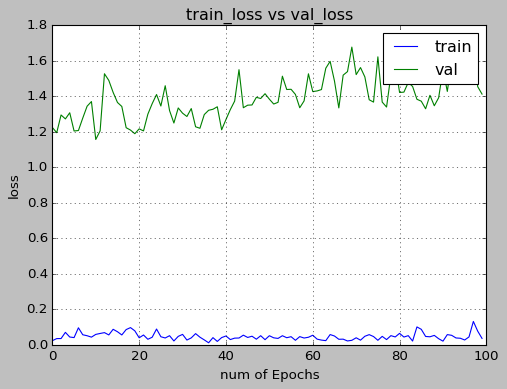

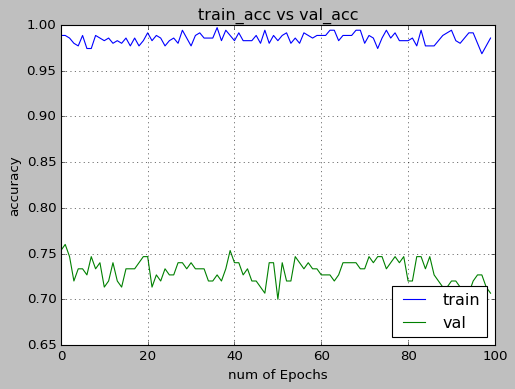

In [60]:
num_classes=10
Y = to_categorical(labels, num_classes)
X_train,y_train = shuffle(data,Y, random_state=2)
X_train, X_test, y_train , y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=2)


sgd = SGD(learning_rate=0.003, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.summary()
# Training
n_epoch=100
hist = model.fit(X_train, y_train, batch_size=15, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))

# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(n_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
predict_x=model.predict(test_image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(y_test[0:1])



In [61]:

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4 8 8 3 3 0 5 8 9 2 1 9 5 9 1 3 2 7 7 1 2 5 8 5 4 7 1 7 9 5 8 2 5 0 8 1 7
 7 9 4 8 1 2 2 8 6 2 2 0 8 6 8 1 5 3 1 7 1 1 0 8 1 5 5 0 8 1 6 4 3 0 5 0 2
 8 3 9 4 7 9 4 6 6 3 1 4 8 4 5 1 8 3 1 5 1 1 7 0 0 9 7 5 3 9 5 2 5 4 8 3 9
 2 8 3 5 9 1 0 3 1 3 3 9 6 7 1 2 2 0 2 0 7 2 9 8 1 0 4 1 2 6 9 0 4 5 2 2 9
 5 0]


Confusion matrix, without normalization


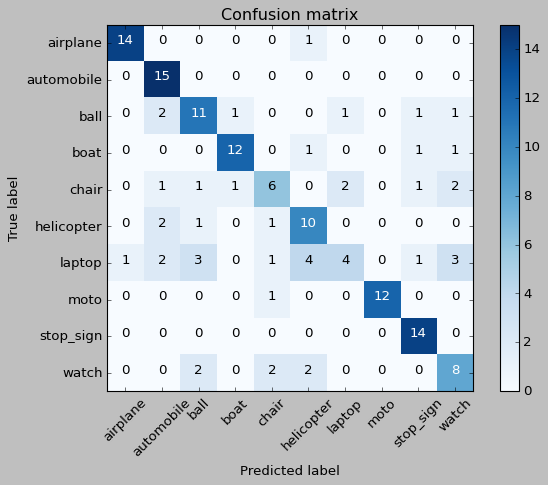

In [62]:
# Compute confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), classes_x))

np.set_printoptions(precision=2)
target_names = os.listdir(data_path)
plot_confusion_matrix(cnf_matrix,normalize=False, classes=target_names,
                      title='Confusion matrix')